<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/stationarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Non)Stationarity

Explaing the concept, types, tests for and transformations of (non)stationarity in time series.

*Author: Alexander Del Toro Barba*

# Import Libraries

In [0]:
# Import packages
import numpy as np
import sklearn
from decimal import *
from numpy import linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import collections
import datetime
import matplotlib
from scipy import stats
import scipy.stats as stats
import matplotlib.pylab as py
import matplotlib.pyplot as plt
from numpy import sqrt
from copy import copy
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import statsmodels
from statsmodels.tsa.stattools import adfuller
from numpy import log

# Create Data

**Random Walk Process - Non-Stationary**

In [0]:
def geometric_brownian_motion(T = 1, N = 100, mu = 0.1, sigma = 0.01, S0 = 20):        
    dt = float(T)/N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N) 
    W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
    X = (mu-0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X) ### geometric brownian motion ###
    return S

dates = pd.date_range('2012-01-01', '2019-02-22')
T = (dates.max()-dates.min()).days / 365
N = dates.size
start_price = 100
randomwalk = pd.Series(
    geometric_brownian_motion(T, N, sigma=0.1, S0=start_price), index=dates)

**White Noise Process - Stationary**

In [0]:
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot

# seed random number generator
seed(1)

# create white noise series
whitenoise = [gauss(0.0, 1.0) for i in range(3000)]
whitenoise = Series(whitenoise)

# Visualize Data

## Random Walk (Non-Stationary)

Text(0, 0.5, 'Value')

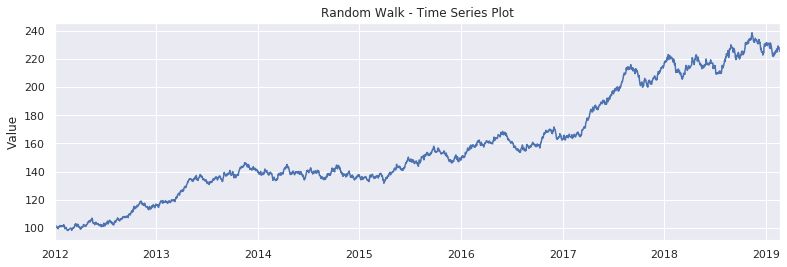

In [0]:
df = randomwalk
sns.set(rc={'figure.figsize':(13, 4)})
df.plot(linewidth=1.5,title='Random Walk - Time Series Plot')
plt.ylabel('Value')

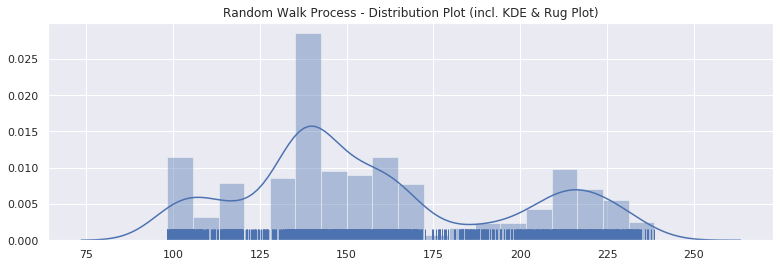

In [0]:
df = randomwalk
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((df), hist=True, rug=True).set_title('Random Walk Process - Distribution Plot (incl. KDE & Rug Plot)')
plt.show()

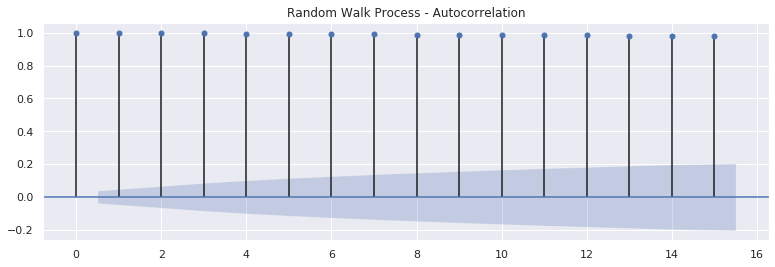

In [0]:
sns.set(rc={'figure.figsize':(13, 4)})
sm.graphics.tsa.plot_acf(randomwalk.squeeze(), lags=15)
plt.title('Random Walk Process - Autocorrelation')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


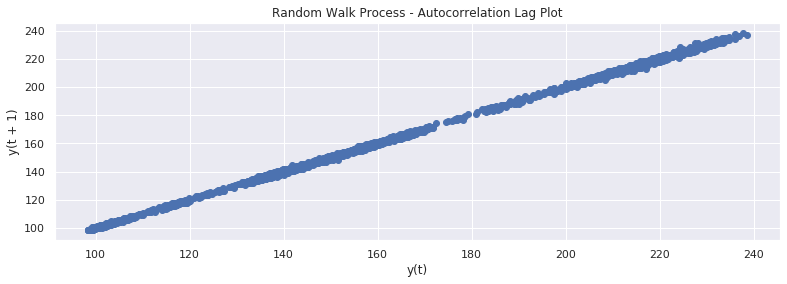

In [0]:
lag_plot(randomwalk)
plt.title('Random Walk Process - Autocorrelation Lag Plot')
plt.show()

## White Noise (Stationary)

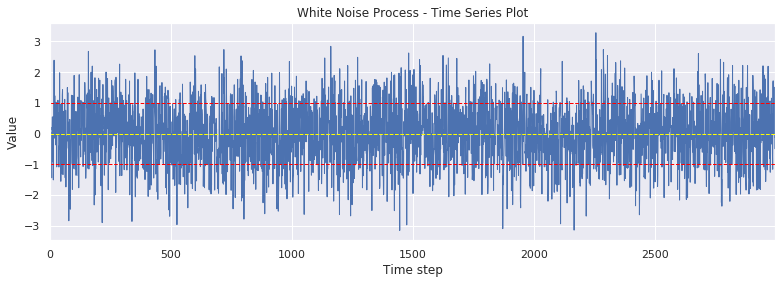

In [0]:
df = whitenoise
sns.set(rc={'figure.figsize':(13, 4)})
df.plot(linewidth=1.0,title='White Noise Process - Time Series Plot')
plt.ylabel('Value')
plt.xlabel('Time step')
plt.axhline(y=1, color='red', linestyle='--', linewidth=1.0);
plt.axhline(y=-1, color='red', linestyle='--', linewidth=1.0);
plt.axhline(y=0, color='yellow', linestyle='--', linewidth=1.0);

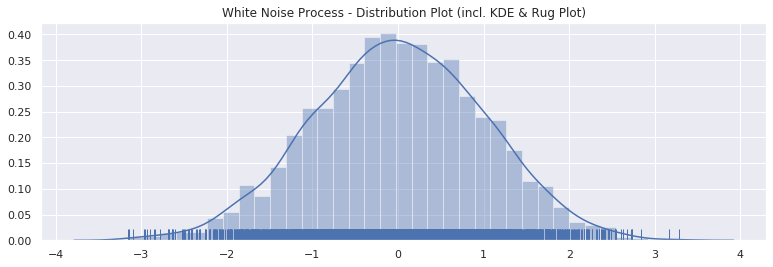

In [0]:
df = whitenoise
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((df), hist=True, rug=True).set_title('White Noise Process - Distribution Plot (incl. KDE & Rug Plot)')
plt.show()

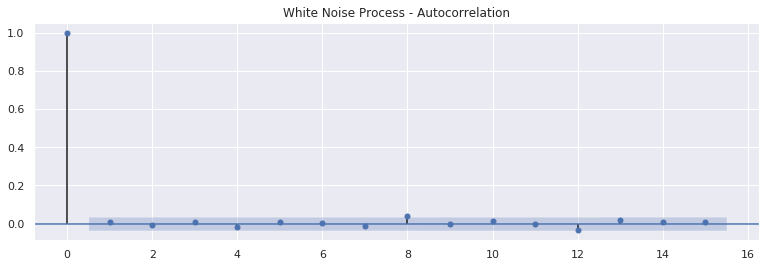

In [0]:
sns.set(rc={'figure.figsize':(13, 4)})
sm.graphics.tsa.plot_acf(whitenoise.squeeze(), lags=15)
plt.title('White Noise Process - Autocorrelation')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


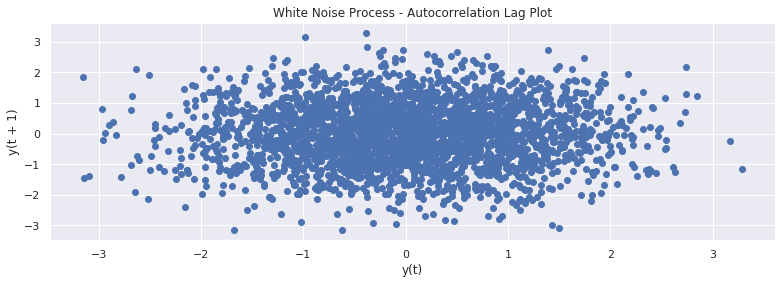

In [0]:
lag_plot(whitenoise)
plt.title('White Noise Process - Autocorrelation Lag Plot')
plt.show()

# Definition of Stationarity

## Weak (Second Order) Stationarity

Following Statistical properties don’t change over time:
1. constant mean (i.e. kein upward Trend)
2. constant variance (i.e. keine zunehmende Volatilität)
3. covariance is independent of time


## Strong Stationarity

* Strictly stationary if all aspects of its behavior are unchanged by shifts in time. A process is said to be strictly stationary if all aspects of its behavior are unchanged by shifts in time - Higher moments also do not change over time (skew, etc.). 
* Strong stationarity requires the shift-invariance (in time) of the finite-dimensional distributions of a stochastic process. This means that the distribution of a finite sub-sequence of random variables of the stochastic process remains the same as we shift it along the time index axis. For example, all i.i.d. stochastic processes are stationary.
* For many applications strict-sense stationarity is too restrictive. Other forms of stationarity such as wide-sense stationarity (second order) or N-th order stationarity are then employed. The definitions for different kinds of stationarity are not consistent among different authors (see Other terminology).


# Relevance of Stationarity

## General Time Series Forecasting

* Stationarity is an assumption underlying many statistical procedures in TS: The stationary stochastic process is a building block of many econometric time series models. Many observed time series, however, have empirical features that are inconsistent with the assumptions of stationarity. 
* Non-stationary data are often transformed to become stationary (transformation is depending on type of non-stationarity)
* If your time series is nonstationary, then generally (!) there are no population counterparts of the sample ACF and PACF. Thus the sample ACF and PACF cannot converge to the population ACF and PACF. While you normally use the sample to make inference about the population or forecast a new sample from the population, nonstationarity does not allow to do that, because in general (!) there is no well-defined population to speak of (the population is changing, possibly unpredictably, with each new time point).
* You have your time series (𝑦𝑡). That time series has certain ACF and PACF. You don't know how the random variables that make up your time series look like, so you can't calculate the ACF and PACF from them. You do know however, some data sampled from those random variables. From that sample you can calculate the sample ACF and sample PACF. There are results from distribution theory that tell you that the sample ACF and sample PACF will be an approximation for the ACF and PACF of the time series. These results are valid under the assumption that the time series has the property of being stationary. Be aware that there are varying definitions of stationarity. You will have to figure out which one the author is referring to.


## In Financial Time Series

Stationarity is the assumption that a random variable, or the distribution from which it's sampled, doesn't change in time. MPT assumes correlations measured in the past will be the same in the future. In reality, this is rarely true as there are market conditions where correlations break down (e.g., as they did in the Financial 15 index in South Africa).

* Often, stock prices are not a stationary process, since we might see a growing trend, or its volatility might increase over time (meaning that variance is changing).
* Viele ökonomische Zeitreihen enthalten einen Trend (oft Unit Root)
* AR(p)-Modelle mit einer Einheitswurzel können einen Trend erfassen
* Die meisten ökonomischen Einheitswurzel-Zeitreihen werden durch einmaliges Differenzieren stationär (d.h. die Zeitreihen sind I(1))
* Stationäre Zeitreihen werden oft als I(0) bezeichnet
* Ideally, we want to have a stationary time series for modelling. Of course, not all of them are stationary, but we can make different transformations to make them stationary.
* Stock prices follow a random walk, i.e., the price of a stock today is equal to its price yesterday plus a random shock. This is a nonstationary time-series. Any shock to the price of this stock is permanent and does not die out like an AR(1) process. (Under chapter 14.5: unit roots, in the book: econometrics).
* The stationary stochastic process is a building block of many econometric time series models. Many observed time series, however, have empirical features that are inconsistent with the assumptions of stationarity. 
* For example, the following plot shows quarterly U.S. GDP measured from 1947 to 2005. There is a very obvious upward trend in this series that one should incorporate into any model for the process.


# Types of Stationarity

The most common cause of violation of stationarity is a trend in the mean, which can be due either to the presence of a unit root or of a deterministic trend. 
* Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
* Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

## Trend Stationary (deterministic)

**Characteristica**
* Variance of the deterministic trend model does not change over time
* Any shock to the price of a stock will phase out / vanish.

**Approach**
* de-trend time series (i.e. log transform for exponential processes like GDP). Reduce trend by applying transformation (log, square root, cube root, etc). 
* Penalizes higher values more than smaller values to eliminate a significant positive trend. You can see then a trend in the data. 
* But its not very intuitive in presence of noise. So we can use some techniques to estimate or model this trend. 
* Most common simple techniques used are (The simple trend reduction techniques don’t work in all cases, particularly the ones with high seasonality. use differencing and decomposition):
** Aggregation – taking average for a time period like monthly/weekly averages
** Smoothing (moving / rolling average) – take average of ‘k’ consecutive values depending on the frequency of time series, then subtract the rolling mean from the original series  and check again for stationarity with dickey fuller test. Types of smoothing: fixed k, time period strictly defined (but complex situations like forecasting a stock price, its difficult to come up with a number) AND ‘weighted moving average’ where more recent values are given a higher weight. - many technique for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor. Hyperparameter: ‘halflife’ is used to define the amount of exponential decay (depends largely on the business domain). Other parameters like span and center of mass can also be used to define decay.
** Polynomial Fitting – fit a regression model



## Difference Stationary (stochastic)

**Characteristica**
* Variance of the random walk with drift grows over time
* Any shock to the price of a stock is permanent and does not die out like an AR(1) process.

**Approach**
* difference the time series. Time series that can be made stationary by differencing are called integrated processes (Daher das Gegenteil: Differenzieren).
* Question: welche Ordnung Instationarität liegt vor? Ist ihre erste Differenz stationär, hat sie die Eigenschaft der Integration erster Ordnung.
* Unit root process: sub-type of difference stationary, integrated of order 1. 

# Select Data Source

In [0]:
# series = whitenoise
series = randomwalk

# Tests for Stationarity

## KPSS Test

* Kwiatkowski-Phillips-Schmidt-Shin to test if time series is stationarity. Computes the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for the null hypothesis that x is level or trend stationary. Stationarity Test: KPSS
* H0: Series has no unit root (is stationary or a deterministic trend). Ha: Series is not stationary
* Reject H0 if  p-value of less than 5% and test stats higher than provided critical values

**Cautions**

* A major disadvantage for the KPSS test is that it has a high rate of Type I errors (it tends to reject the null hypothesis too often). If attempts are made to control these errors (by having larger p-values), then that negatively impacts the test’s power.

* One way to deal with the potential for high Type I errors is to combine the KPSS with an ADF test. If the result from both tests suggests that the time series in stationary, then it probably is.

* https://www.statisticshowto.datasciencecentral.com/kpss-test/

**KPSS - Level Stationarity Test**

‘c’ : The data is stationary around a constant (default).

H0 = Stationary (Stochastic Trend). H1 = Non-Stationary (Unit Root)

Reject H0 if p-value of less than 5% and test stats higher than provided critical values

In [0]:
statsmodels.tsa.stattools.kpss(series, regression='c', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(8.252315453460728,
 0.01,
 28,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

**KPSS - Trend Stationarity Test**

‘ct’ : The data is stationary around a trend.

H0 = Deterministic Trend. H1 = Non-Stationary (Unit Root)

Reject H0 if p-value of less than 5% and test stats higher than provided critical values

In [0]:
statsmodels.tsa.stattools.kpss(series, regression='ct', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(1.390222068863641,
 0.01,
 28,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

## Augmented Dickey Fuller Test

The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.

H0: There is a unit root for the series (non stationary)

Ha: There is no unit root for the series. The series is stationary.

Reject H0 if p-value of less than 5% and test stats higher than provided critical values

**Choose regression {‘c’,’ct’,’ctt’,’nc’} - Constant and trend order to include in regression.**

* ‘c’ : constant only (default).
* ‘ct’ : constant and trend.
* ‘ctt’ : constant, and linear and quadratic trend.
* ‘nc’ : no constant, no trend.

In [0]:
# no constant, no trend
statsmodels.tsa.stattools.adfuller(series, maxlag=None, regression='nc', autolag='AIC', store=False, regresults=False)

(2.7890716352885816,
 0.9994469009844779,
 0,
 2609,
 {'1%': -2.566597489531549,
  '10%': -1.6167185958294654,
  '5%': -1.94110344391691},
 6488.808771810972)

## Zivot-Andrews Structural-break

Unit root tests can be wrong if a structural break occurred in timeseries. Zivot-Andrews test checks for structural Break Unit Root.

H0 = unit root with a single structural break

In [0]:
statsmodels.tsa.stattools.zivot_andrews(series, regression='c', autolag='aic')

AttributeError: ignored